In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
loan=pd.read_csv('loan.csv')
loan.head(10)

/Users/shreyas/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [168]:
loan.shape

(38577, 38)

In [169]:
loan.id.nunique()

38577

In [170]:
loan.set_index('id',inplace=True)

In [3]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [4]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

In [5]:
len(loan.columns)

111

In [6]:
loan.shape

(39717, 111)

In [7]:
loan.isnull().all().sum()

54

In [8]:
#Dropping all columns with NaN values, dropped 54 columns
loan.dropna(axis=1, how='all', inplace=True)

In [9]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [10]:
#Dropping > 90%
loan.drop(['mths_since_last_record','next_pymnt_d'], axis=1, inplace=True)

In [11]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [12]:
loan.shape

(39717, 55)

In [14]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [449]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

In [15]:
loan['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [16]:
loan['grade'].value_counts()

B    12020
A    10085
C     8098
D     5307
E     2842
F     1049
G      316
Name: grade, dtype: int64

In [17]:
loan.groupby(['grade','sub_grade'])['sub_grade'].count()

grade  sub_grade
A      A1           1139
       A2           1508
       A3           1810
       A4           2886
       A5           2742
B      B1           1830
       B2           2057
       B3           2917
       B4           2512
       B5           2704
C      C1           2136
       C2           2011
       C3           1529
       C4           1236
       C5           1186
D      D1            931
       D2           1348
       D3           1173
       D4            981
       D5            874
E      E1            763
       E2            656
       E3            553
       E4            454
       E5            416
F      F1            329
       F2            249
       F3            185
       F4            168
       F5            118
G      G1            104
       G2             78
       G3             48
       G4             56
       G5             30
Name: sub_grade, dtype: int64

In [18]:
loan['application_type'].value_counts()

INDIVIDUAL    39717
Name: application_type, dtype: int64

In [455]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


In [19]:
#deleting columns as values are 0 and same value
loan.drop(['acc_now_delinq','collections_12_mths_ex_med','chargeoff_within_12_mths','delinq_amnt','tax_liens','initial_list_status','pymnt_plan','policy_code'], axis=1, inplace=True)

In [457]:
loan.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,policy_code,pub_rec_bankruptcies
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.0,39020.000000
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,1.0,0.043260
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,0.204324
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,1.0,0.000000
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,34.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,546.140000,1.0,0.000000
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,52.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,3293.160000,1.0,0.000000
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,36115.200000,1.0,2.000000


In [20]:
loan['int_rate'] = [x.strip('%') for x in loan['int_rate']]
loan['int_rate'] = loan['int_rate'].astype(float)
loan['int_rate'].describe() 

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

In [37]:
#deleting text variables and the variable which would not be helpful in analysis
loan.drop(['member_id','emp_title','url','desc','zip_code','revol_bal','revol_util','application_type','mths_since_last_delinq','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d'], axis=1, inplace=True)

In [23]:
loan['emp_length'].value_counts()

10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [24]:
emp_experience = {
    "10+ years" : 10,
    "< 1 year" : 0,
    "2 years" : 2,
    "1 year" : 1,
    "3 years" : 3,
    "4 years" : 4,
    "5 years" : 5,
    "6 years" : 6,
    "7 years" : 7,
    "8 years" : 8,
    "9 years" : 9,
    
}
loan = loan.replace({"emp_length":emp_experience})


In [25]:
loan['emp_length'].value_counts()

10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: emp_length, dtype: int64

In [26]:
loan['pub_rec_bankruptcies'].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [27]:
loan['emp_length']=loan['emp_length'].fillna(loan['emp_length'].mode()[0])
loan['pub_rec_bankruptcies']=loan['pub_rec_bankruptcies'].fillna(loan['pub_rec_bankruptcies'].mode()[0])

In [28]:
loan['home_ownership'].value_counts()

RENT        18899
MORTGAGE    17659
OWN          3058
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

In [29]:
#imputing NONE with mode
loan['home_ownership']=loan['home_ownership'].replace('NONE',loan['home_ownership'].mode()[0])

In [34]:
round(100*(loan.isnull().sum()/len(loan.index)),2)

id                         0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 0.00
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
purpose                    0.00
title                      0.03
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_pymnt                0.00
total_pymnt_inv            0.00
total_rec_prncp            0.00
total_rec_int              0.00
total_re

In [35]:
loan['issue_d']=pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['earliest_cr_line']=pd.to_datetime(loan['earliest_cr_line'],format='%b-%y')

In [36]:
loan[loan['earliest_cr_line'].dt.year>2008]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,last_credit_pull_d,policy_code,pub_rec_bankruptcies
1576,1048395,21000,21000,20875.000000,36 months,7.51,653.33,A,A3,10.0,MORTGAGE,49200.00,Verified,2011-12-01,Fully Paid,credit_card,Happiness is,MT,27.02,0,2062-09-01,1,8,0,15,0.00,0.00,23047.246210,22910.06,21000.00,2047.25,0.000000,0.000000,0.0000,10000.95,Sep-13,1,0.0
1764,1042802,5500,5500,5500.000000,36 months,7.51,171.11,A,A3,4.0,RENT,63000.00,Verified,2011-12-01,Fully Paid,other,shovelhead,CA,5.56,2,2068-09-01,0,6,0,15,0.00,0.00,5538.320000,5538.32,5500.00,38.32,0.000000,0.000000,0.0000,539.21,Sep-15,1,0.0
2792,1031659,5200,5200,5200.000000,60 months,8.90,107.70,A,A5,10.0,RENT,36000.00,Source Verified,2011-11-01,Current,vacation,Wedding/Vacation,NY,8.17,0,2064-09-01,0,6,0,25,754.60,754.60,5716.430000,5716.43,4445.40,1241.07,29.962286,0.000000,0.0000,107.70,May-16,1,0.0
3274,1021976,5000,5000,5000.000000,36 months,12.69,167.73,B,B5,10.0,MORTGAGE,72000.00,Source Verified,2011-11-01,Fully Paid,vacation,Family getaway,PA,7.75,0,2067-09-01,1,5,0,25,0.00,0.00,6039.332116,6039.33,5000.00,1039.33,0.000000,0.000000,0.0000,187.76,May-15,1,0.0
3349,1013619,21000,21000,21000.000000,36 months,12.69,704.45,B,B5,10.0,MORTGAGE,267000.00,Source Verified,2011-11-01,Fully Paid,small_business,Growing Business,CO,8.87,0,2065-02-01,2,10,0,27,0.00,0.00,25359.830010,25359.83,21000.00,4359.83,0.000000,0.000000,0.0000,725.56,Nov-14,1,0.0
3403,1017623,15000,15000,14900.000000,60 months,16.77,370.94,D,D2,0.0,MORTGAGE,58000.00,Verified,2011-11-01,Charged Off,debt_consolidation,a new start,NH,22.08,0,2067-06-01,0,11,0,18,0.00,0.00,10248.670000,10180.30,2077.68,2370.40,0.000000,5800.590000,472.3020,29.88,Apr-13,1,0.0
3595,1014199,35000,35000,34773.917180,60 months,15.96,850.39,C,C5,10.0,MORTGAGE,102158.00,Verified,2011-11-01,Fully Paid,major_purchase,Finance autos,FL,14.61,0,2067-08-01,1,24,0,55,0.00,0.00,46149.378530,45831.04,35000.00,11149.38,0.000000,0.000000,0.0000,22370.64,Apr-14,1,0.0
3976,985909,5000,5000,5000.000000,36 months,6.03,152.18,A,A1,10.0,OWN,25000.00,Verified,2011-11-01,Fully Paid,debt_consolidation,Debt Consolidation Loan,CA,29.86,0,2063-12-01,0,12,0,27,0.00,0.00,5478.387981,5478.39,5000.00,478.39,0.000000,0.000000,0.0000,154.50,Nov-14,1,0.0
4426,1002778,12000,12000,11925.000000,60 months,14.27,280.91,C,C2,10.0,MORTGAGE,80000.00,Not Verified,2011-11-01,Fully Paid,debt_consolidation,Debt Consolidation,CA,5.20,0,2068-09-01,2,14,0,51,0.00,0.00,14076.096090,13988.12,12000.00,2076.10,0.000000,0.000000,0.0000,9872.83,May-16,1,0.0
4435,1002584,10000,10000,10000.000000,36 months,6.03,304.36,A,A1,10.0,OWN,50000.00,Source Verified,2011-11-01,Fully Paid,debt_consolidation,Get out of debt,MI,13.18,0,2068-09-01,0,11,0,23,0.00,0.00,10956.775960,10956.78,10000.00,956.78,0.000000,0.000000,0.0000,307.55,Oct-15,1,0.0


In [38]:
#Converting years to years above 2008 and below 1969, which is wrongly parsed as 20xx to 19xx
loan['ear_cr_yr']=loan['earliest_cr_line'].dt.year
loan['ear_cr_yr']=loan['ear_cr_yr'].apply(lambda x: int('19'+str(x)[2:]) if int(str(x)[2:])<69 and int(str(x)[2:])>8 else x)

In [45]:
loan['issue_yr']=loan['issue_d'].dt.year

In [46]:
loan['issue_yr'].unique()

array([2011, 2010, 2009, 2008, 2007])

In [43]:
#Removing Current loans as it won't help in determining Default rate
loan=loan[~loan['loan_status'].isin(['Current'])]

In [44]:
loan.shape

(38577, 37)

In [50]:
masterDF=loan.copy()

# Univariate Analysis

In [51]:
loan_stat=100*masterDF['loan_status'].value_counts(normalize=True)
loan_stat

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

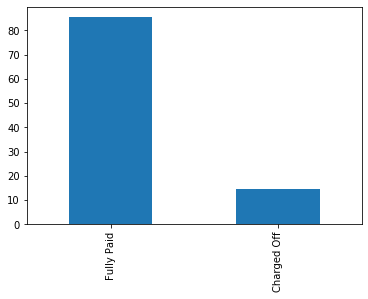

In [49]:
loan_stat.plot.bar()

In [ ]:
#Overall 14.58% of the loans issued from 2007 to 2011 got Charged off 

**"Variable: loan_amount"**





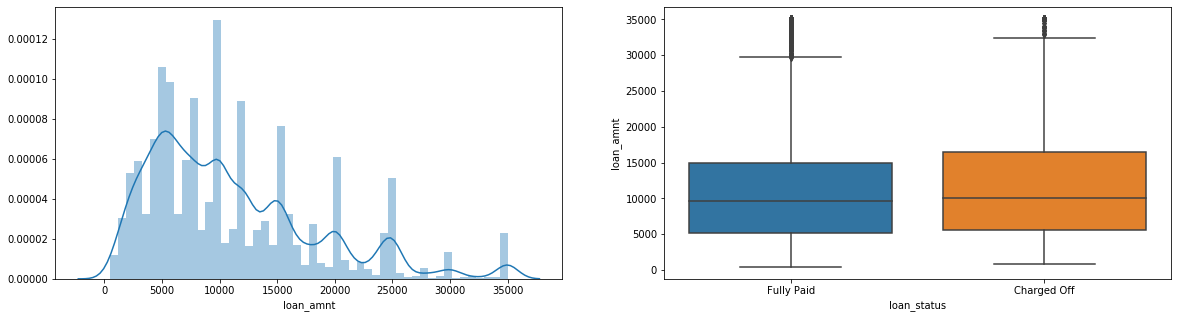

In [56]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(masterDF['loan_amnt'])
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y='loan_amnt', data=masterDF)
plt.show()

**"Observation"**
1. Many people opt for loan amount= 10,000
2. There are spikes over each 5000 multiple, which concludes people request loans rounding off to nearest 5000 multiple. 

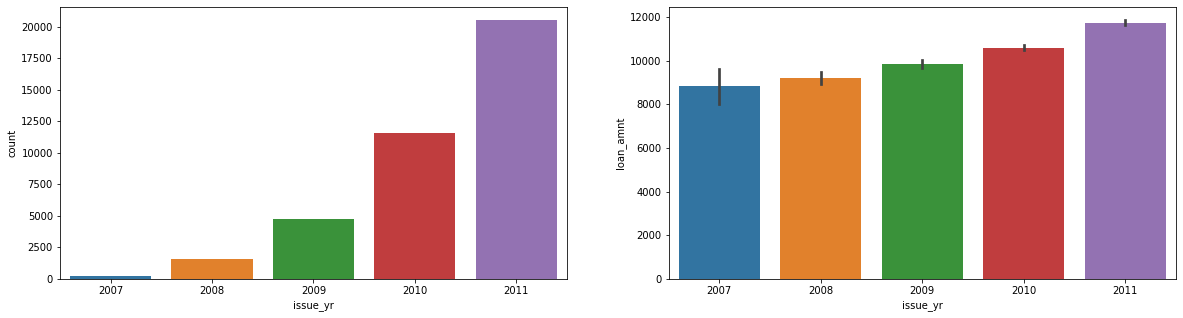

In [62]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.countplot('issue_yr',data=masterDF)
plt.subplot(1,2,2)
sns.barplot(x='issue_yr',y='loan_amnt',data=masterDF)
plt.show()

In [ ]:
#Loans were issued exponentially from 2007 onwards
#Higher loan amounts were issued as the years progressed from 2007 to 2011

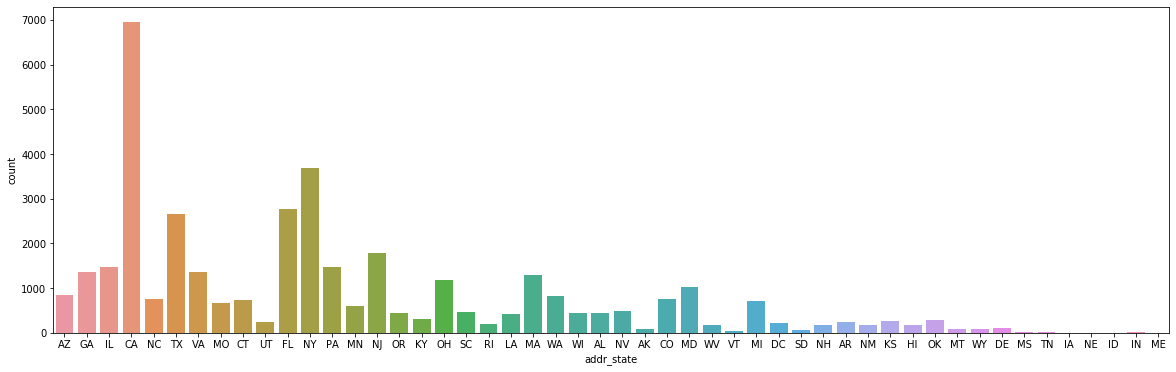

In [60]:
plt.figure(figsize=(20,6))
sns.countplot('addr_state', data=masterDF)
plt.show()

In [65]:
#The state of CA highest number of loans were offered

**"Variable: term"**

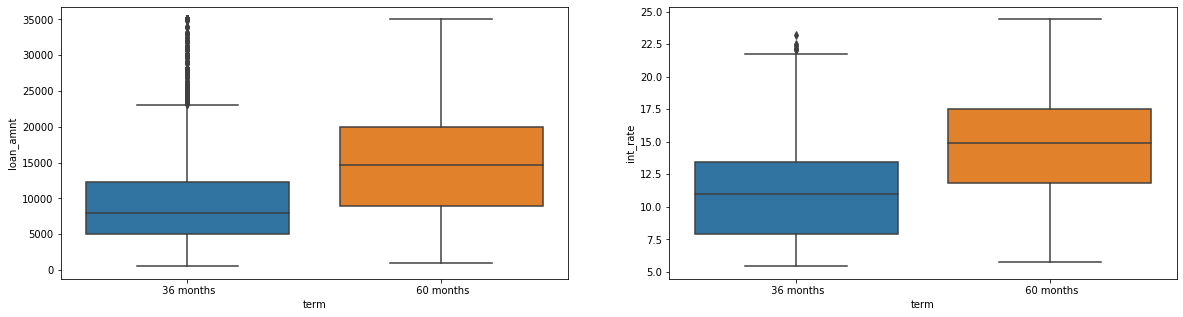

In [61]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.boxplot(x='term', y='loan_amnt', data=masterDF)
plt.subplot(1,2,2)
sns.boxplot(x='term', y='int_rate', data=masterDF)
plt.show()

**"Observation"**
1. People avail almost double the amount of loan for 60months of duration compared to 36months
2. Whereas the max amount of loan availed is the same in both the cases
3. There is almost 4% increase in interest rates offered for loans of 60months duration

In [228]:
# term is categorical variable
masterDF.loc[masterDF['loan_status']=="Charged Off"]['term'].value_counts(normalize=True)*100

 36 months    57.348498
 60 months    42.651502
Name: term, dtype: float64

In [ ]:
#Variable dti

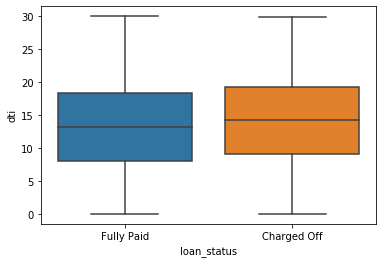

In [69]:
sns.boxplot(x='loan_status', y='dti', data=loan)
plt.show()

In [ ]:
#1. Debt-to-income ratio is higher for Charged-off

**"Variable - Interest rate"**

In [232]:
masterDF['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

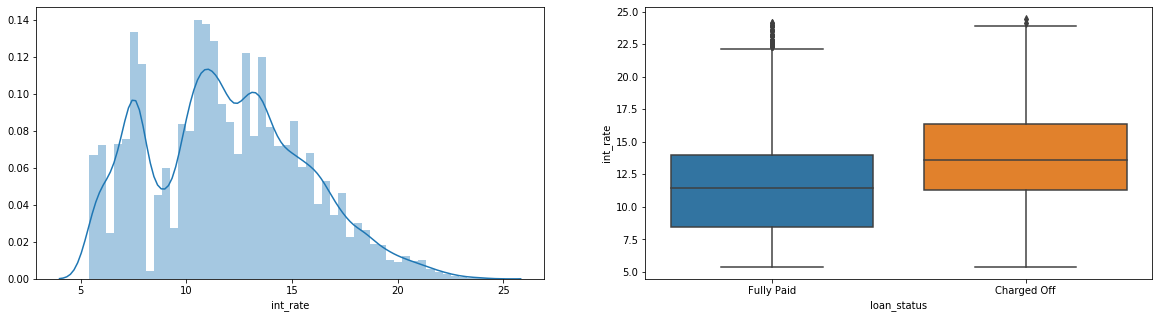

In [66]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(masterDF['int_rate'])
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y='int_rate', data=masterDF)


**"Observation"**
1. Average interest rate is  11.9%, and rate of interest is higher for charged off loans as risk is higher, interest rate is also increased

**"Variable: Installments"**

In [67]:
masterDF['installment'].describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

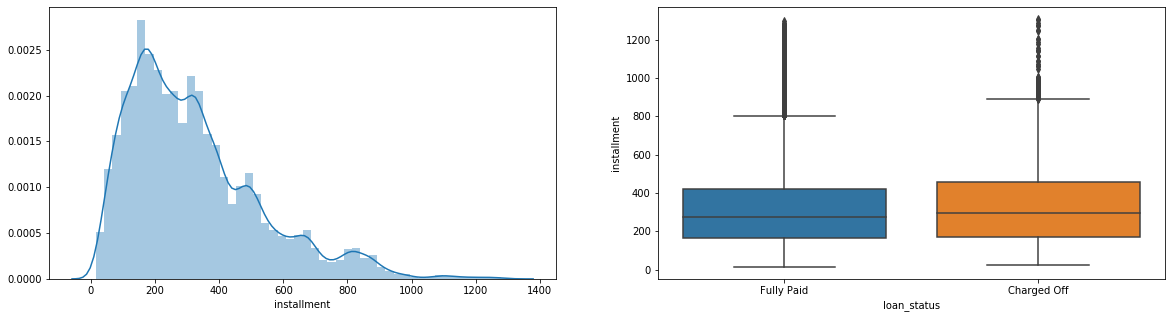

In [68]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
sns.distplot(masterDF['installment'])
plt.subplot(1,2,2)
sns.boxplot(x='loan_status', y='installment', data=masterDF)
plt.show()

**"Observation"**
1. On an average, charged off has more installment amount over fully paid, and the distribution is similar.

In [ ]:
#Purpose

In [70]:
purpose_per=100*loan['purpose'].value_counts(normalize=True)
purpose_per

debt_consolidation    46.802499
credit_card           13.031081
other                 10.018923
home_improvement       7.452627
major_purchase         5.573269
small_business         4.546751
car                    3.885735
wedding                2.400394
medical                1.765301
moving                 1.493118
vacation               0.972082
house                  0.951344
educational            0.842471
renewable_energy       0.264406
Name: purpose, dtype: float64

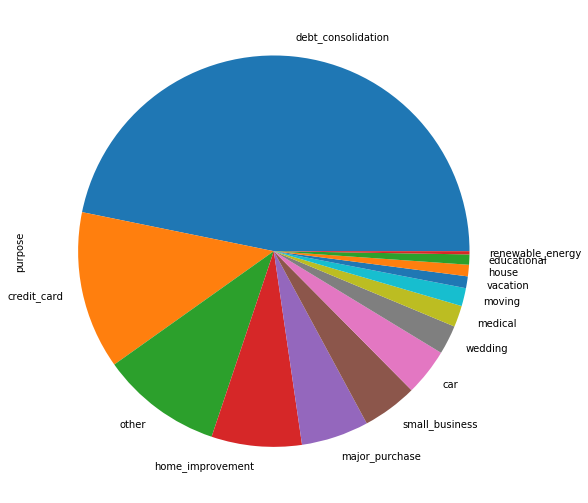

In [72]:
purpose_per.plot(kind='pie', figsize=(9,9))

In [ ]:
#From the above chart, it's clear that debt consolidation has the highest percentage of loans (by count)
#Next top purpose is credit card
#The least number of loans is taken for renewable energy 

**"Variable: Grade"**


In [251]:
masterDF.groupby(['grade','sub_grade'])['loan_amnt'].mean()

grade  sub_grade
A      A1            7261.040386
       A2            7361.306366
       A3            7886.698895
       A4            9319.822485
       A5            9632.955801
B      B1            9700.820812
       B2           10396.226887
       B3           11392.716814
       B4           11199.446040
       B5           11453.499044
C      C1           10970.559611
       C2           11191.261005
       C3           10719.321237
       C4           10420.936982
       C5           10447.097054
D      D1           10008.404941
       D2           11410.419907
       D3           12488.642473
       D4           13288.044662
       D5           13900.689448
E      E1           14628.774238
       E2           14976.750814
       E3           15456.395349
       E4           16549.941038
       E5           18102.777778
F      F1           17861.885246
       F2           17497.424893
       F3           18251.149425
       F4           17652.980132
       F5           20308.

**"Observations:"**
1. LC assigns grade according to the loan amount starting from A-A1 to G-G5,  as the loan amount increases, grade/subgrade increases.

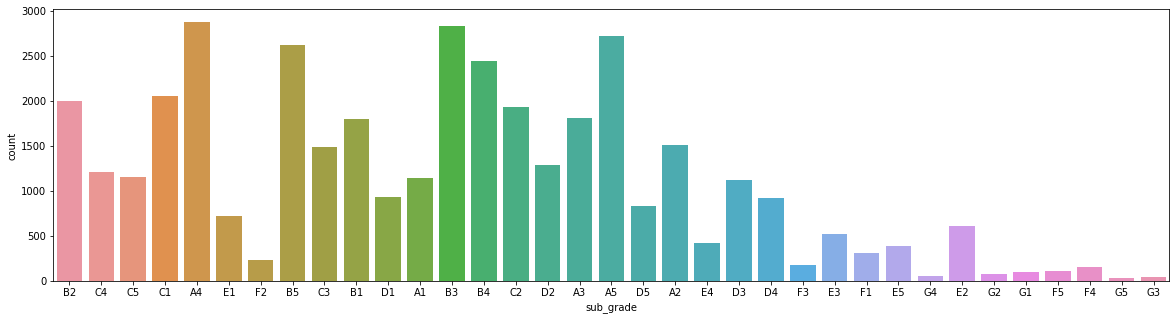

In [73]:
plt.figure(figsize=(20,5))
sns.countplot(masterDF['sub_grade'])

In [74]:
chargedOffGrades = masterDF.groupby('grade')['loan_status'].value_counts().loc[:,'Charged Off']
fullyPaidGrades = masterDF.groupby('grade')['loan_status'].value_counts().loc[:,'Fully Paid']

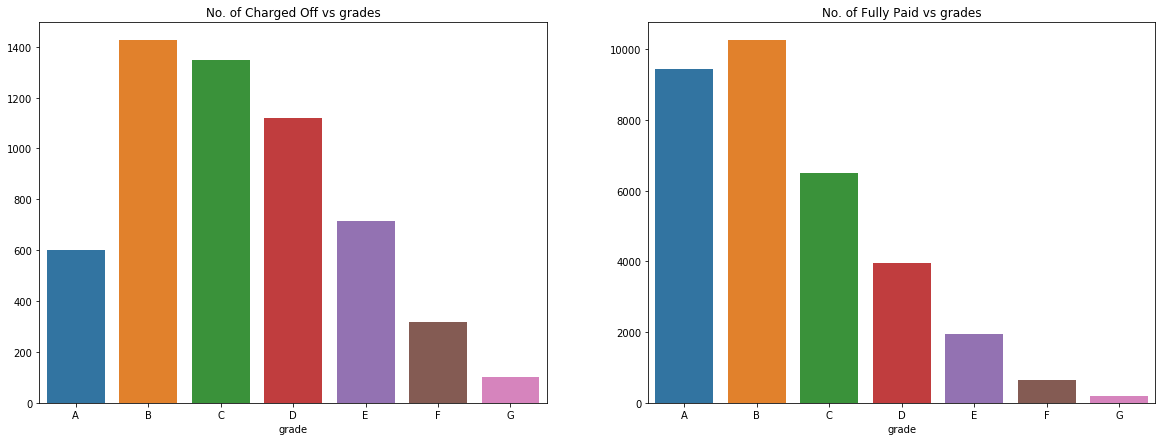

In [83]:
plt.figure(figsize=(20,7))
plt.subplot(1,2,1)
plt.gca().set_title('No. of Charged Off vs grades')
sns.barplot(x=chargedOffGrades.index,y=chargedOffGrades.values)
plt.subplot(1,2,2)
plt.gca().set_title('No. of Fully Paid vs grades')
sns.barplot(x=fullyPaidGrades.index,y=fullyPaidGrades.values)
plt.show()

In [ ]:
#Assigning Grade B has been observed as having high charge offs
#Next is Grade C and Grade D
#Loans with Grade A have performed better in Fully Paid but not in Charged off

In [88]:
#Finding the fraction of charged-off loans in each sub-grade
grade_c=masterDF.groupby(['grade','sub_grade','loan_status'])['loan_status'].count()
e=round(100*(grade_c / grade_c.groupby(level=1).sum()),2)
e

grade  sub_grade  loan_status
A      A1         Charged Off     2.63
                  Fully Paid     97.37
       A2         Charged Off     4.91
                  Fully Paid     95.09
       A3         Charged Off     5.69
                  Fully Paid     94.31
       A4         Charged Off     6.20
                  Fully Paid     93.80
       A5         Charged Off     7.99
                  Fully Paid     92.01
B      B1         Charged Off     9.52
                  Fully Paid     90.48
       B2         Charged Off    11.39
                  Fully Paid     88.61
       B3         Charged Off    12.07
                  Fully Paid     87.93
       B4         Charged Off    13.50
                  Fully Paid     86.50
       B5         Charged Off    13.61
                  Fully Paid     86.39
C      C1         Charged Off    16.35
                  Fully Paid     83.65
       C2         Charged Off    16.62
                  Fully Paid     83.38
       C3         Charged Off    1

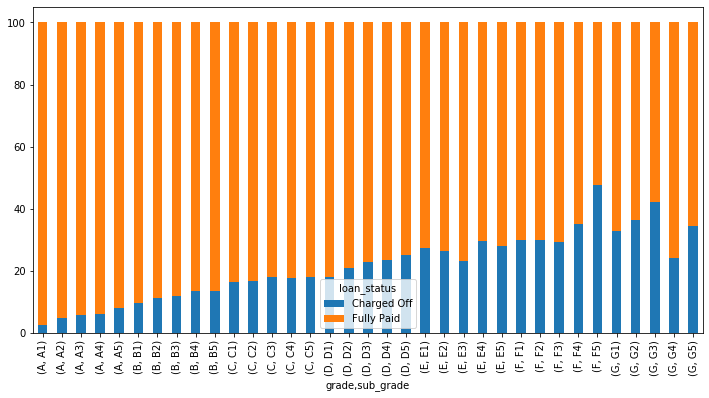

In [89]:
e.unstack().plot(kind='bar', figsize=(12,6), stacked=True)
plt.show()

In [ ]:
#Among each sub-grade
#The fraction of Charge-Offs is steadily increasing from A1 to G5
#F5 sub-grade loans are highly Charged-Off, at 47%
#This is followed by G3 at 42% and G2 at 36% charge-offs

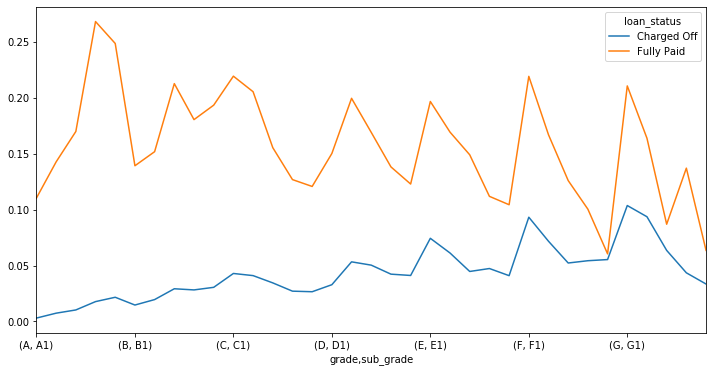

In [93]:
#Finding the fraction of charged-off sub-grade loans in each grade
g=grade_c / grade_c.groupby(level=0).sum()
g.unstack().plot(kind='line', figsize=(12,6))
plt.show()

**"Observations:"**
Grades can be compared to how good their credit profiles are.
Hence, better the credit profile, better is their grade
1. Grade A loans high fraction of Fully paid loans as compared to other grades, as they had a good credit profile.
2. Sudden spikes of high default rate are observed at E1, F1 and G1, so these are very risky sub-grades
3. The default rate and the fully paid trend for every grade from C onwards follows a trend of decreasing rate with increasing sub_grades after a spike in the beginning

**Variable: emp_length**

In [94]:
masterDF['emp_length'].value_counts()

10.0    9521
0.0     4508
2.0     4291
3.0     4012
4.0     3342
5.0     3194
1.0     3169
6.0     2168
7.0     1711
8.0     1435
9.0     1226
Name: emp_length, dtype: int64

In [95]:
masterDF['emp_length'].value_counts().sum()

38577

In [96]:
a = round(100*(masterDF['emp_length'].value_counts()/masterDF['emp_length'].value_counts().sum()),2)
a

10.0    24.68
0.0     11.69
2.0     11.12
3.0     10.40
4.0      8.66
5.0      8.28
1.0      8.21
6.0      5.62
7.0      4.44
8.0      3.72
9.0      3.18
Name: emp_length, dtype: float64

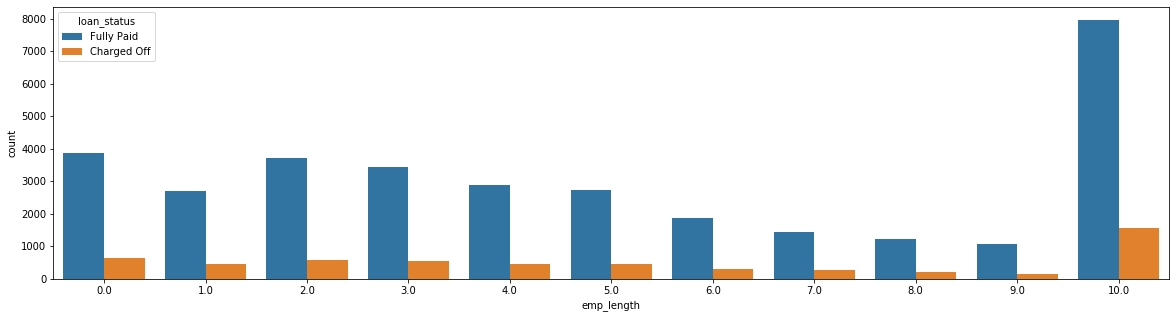

In [97]:
plt.figure(figsize=(20,5))
sns.countplot(masterDF['emp_length'],hue='loan_status',data=masterDF,order=sorted(masterDF['emp_length'].unique()))

**"Observations:"**
1. 22.6% of applicants are having an employment duration of 10+ years.

**Variable: home_ownership**

In [98]:
masterDF['home_ownership'].value_counts()

RENT        18483
MORTGAGE    17021
OWN          2975
OTHER          98
Name: home_ownership, dtype: int64

In [106]:
owner_c=masterDF.groupby(['home_ownership','loan_status'])['loan_status'].count()
owner_c

home_ownership  loan_status
MORTGAGE        Charged Off     2327
                Fully Paid     14694
OTHER           Charged Off       18
                Fully Paid        80
OWN             Charged Off      443
                Fully Paid      2532
RENT            Charged Off     2839
                Fully Paid     15644
Name: loan_status, dtype: int64

In [107]:
d=round(100*(owner_c / len(masterDF)),2)
d

home_ownership  loan_status
MORTGAGE        Charged Off     6.03
                Fully Paid     38.09
OTHER           Charged Off     0.05
                Fully Paid      0.21
OWN             Charged Off     1.15
                Fully Paid      6.56
RENT            Charged Off     7.36
                Fully Paid     40.55
Name: loan_status, dtype: float64

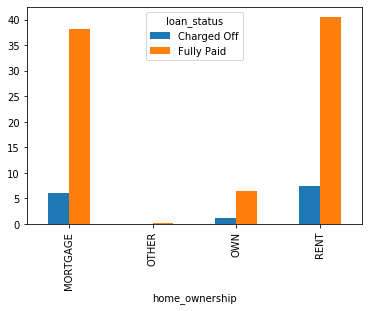

In [108]:
d.unstack().plot(kind='bar', figsize=(6,4))
plt.show()

**"Observations:"**
1. People who have Rented their house, have higher chance of getting charged-off at 7%
2. People with Mortgage type is not far behind at the default-rate at 6%

In [115]:
#Assigning 1 to Charged-Off and 0 to Fully Paid, for ease of analysing
masterDF['loan_status'] = masterDF['loan_status'].map({'Charged Off': 1, 'Fully Paid': 0})

**Variable: Annual Income**

In [334]:
masterDF['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [109]:
#Removing outlier income using z-score method that are not verified
loan_out=masterDF[(np.abs(stats.zscore(masterDF['annual_inc'])) > 3)]
drop_rows=list(loan_out[loan_out['verification_status']=='Not Verified'].index)
masterDF.drop(drop_rows, inplace=True)

In [111]:
#Creating three ordered bins/category for income as low, medium and high based on Pew's Classification of income
#middle class => those earning between two-thirds and double the median household income. 
masterDF['inc_cat']=pd.cut(masterDF['annual_inc'], bins=[0,40000,120000,6000000], labels=['low','medium','high'])

In [161]:
masterDF.describe()

,id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,policy_code,pub_rec_bankruptcies,ear_cr_yr,issue_yr,credit_age
count,3.850600e+04,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,3.850600e+04,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.0,38506.0,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.000000,38506.0,38506.000000,38506.000000,38506.000000,38506.000000
mean,6.767252e+05,11041.745442,10779.339583,10219.644111,11.931144,322.250625,5.075702,6.779822e+04,0.145925,13.289028,0.146575,0.870955,9.272789,0.055446,22.042097,0.0,0.0,11861.268882,11266.957089,9643.206148,2118.548315,1.367360,98.147139,12.777374,1.0,0.042721,1996.611385,2010.310549,13.699164
std,2.092043e+05,7346.304023,7088.271455,7020.423505,3.692614,208.453009,3.602551,5.563284e+04,0.353036,6.665693,0.492160,1.070745,4.399852,0.237866,11.419851,0.0,0.0,8806.804720,8697.315849,7006.365065,2389.853703,7.314023,699.213522,150.934202,0.0,0.202870,6.813658,0.881919,6.824544
min,5.473400e+04,500.000000,500.000000,0.000000,5.420000,15.690000,0.000000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,1946.000000,2007.000000,3.000000
25%,5.125838e+05,5300.000000,5175.000000,5000.000000,8.940000,165.740000,2.000000,4.000000e+04,0.000000,8.160000,0.000000,0.000000,6.000000,0.000000,13.000000,0.0,0.0,5511.097500,5019.342500,4500.000000,643.880000,0.000000,0.000000,0.000000,1.0,0.000000,1993.000000,2010.000000,9.000000
50%,6.570435e+05,9600.000000,9500.000000,8725.000000,11.710000,277.630000,4.000000,5.860000e+04,0.000000,13.380000,0.000000,1.000000,9.000000,0.000000,20.000000,0.0,0.0,9667.562883,9063.595000,8000.000000,1299.485000,0.000000,0.000000,0.000000,1.0,0.000000,1998.000000,2011.000000,12.000000
75%,8.293410e+05,15000.000000,15000.000000,14000.000000,14.372500,425.205000,9.000000,8.200000e+04,0.000000,18.567500,0.000000,1.000000,12.000000,0.000000,29.000000,0.0,0.0,16119.243713,15319.450000,13125.000000,2670.615000,0.000000,0.000000,0.000000,1.0,0.000000,2001.000000,2011.000000,17.000000
max,1.077501e+06,35000.000000,35000.000000,35000.000000,24.400000,1305.190000,10.000000,6.000000e+06,1.000000,29.990000,11.000000,8.000000,44.000000,4.000000,90.000000,0.0,0.0,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,1.0,2.000000,2008.000000,2011.000000,65.000000


In [112]:
masterDF['inc_cat'].value_counts()

medium    25726
low        9698
high       3082
Name: inc_cat, dtype: int64

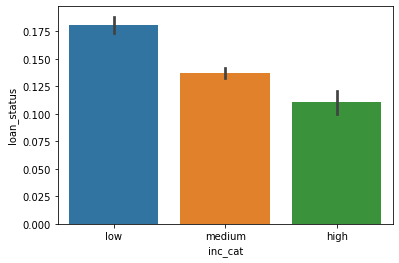

In [116]:
sns.barplot(x='inc_cat',y='loan_status',data=masterDF)
plt.show()

In [ ]:
#We see that low income people loans leads to higher chances of Charge-Offs
#Income is a good indicator of Charged-Off loans

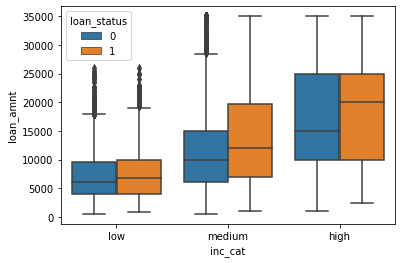

In [118]:
sns.boxplot(x='inc_cat',y='loan_amnt',hue='loan_status',data=masterDF)
plt.show()

In [ ]:
#Higher income people took higher loan
#Charged off loans are higher than the ones fully paid in all class of income

In [370]:
masterDF.groupby('addr_state')['loan_status'].value_counts(normalize=True)

addr_state  loan_status
AK          Fully Paid     0.807692
            Charged Off    0.192308
AL          Fully Paid     0.875289
            Charged Off    0.124711
AR          Fully Paid     0.885106
            Charged Off    0.114894
AZ          Fully Paid     0.855792
            Charged Off    0.144208
CA          Fully Paid     0.837994
            Charged Off    0.162006
CO          Fully Paid     0.871560
            Charged Off    0.128440
CT          Fully Paid     0.869986
            Charged Off    0.130014
DC          Fully Paid     0.928910
            Charged Off    0.071090
DE          Fully Paid     0.893805
            Charged Off    0.106195
FL          Fully Paid     0.819394
            Charged Off    0.180606
GA          Fully Paid     0.841679
            Charged Off    0.158321
HI          Fully Paid     0.831325
            Charged Off    0.168675
IA          Fully Paid     1.000000
ID          Fully Paid     0.833333
            Charged Off    0.166667
IL  

In [120]:
chargedOffPortions = masterDF.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,1]
fullPaidPortions = masterDF.groupby('addr_state')['loan_status'].value_counts(normalize=True).loc[:,0]
r =fullPaidPortions- chargedOffPortions
r
#here those state having a value near to zero or having a negative value are risky for lending the amount

addr_state
AK    0.615385
AL    0.750577
AR    0.770213
AZ    0.711584
CA    0.675987
CO    0.743119
CT    0.739972
DC    0.857820
DE    0.787611
FL    0.638789
GA    0.683358
HI    0.662651
IA         NaN
ID    0.666667
IL    0.732881
IN         NaN
KS    0.756863
KY    0.710611
LA    0.750588
MA    0.754630
MD    0.683284
ME         NaN
MI    0.707386
MN    0.732231
MO    0.659193
MS    0.789474
MT    0.734940
NC    0.695594
NE   -0.200000
NH    0.698795
NJ    0.688515
NM    0.668508
NV    0.552301
NY    0.732031
OH    0.738095
OK    0.721254
OR    0.673563
PA    0.754434
RI    0.742268
SC    0.712418
SD    0.612903
TN    0.764706
TX    0.761689
UT    0.682540
VA    0.740849
VT    0.773585
WA    0.689487
WI    0.713636
WV    0.755814
WY    0.900000
Name: loan_status, dtype: float64

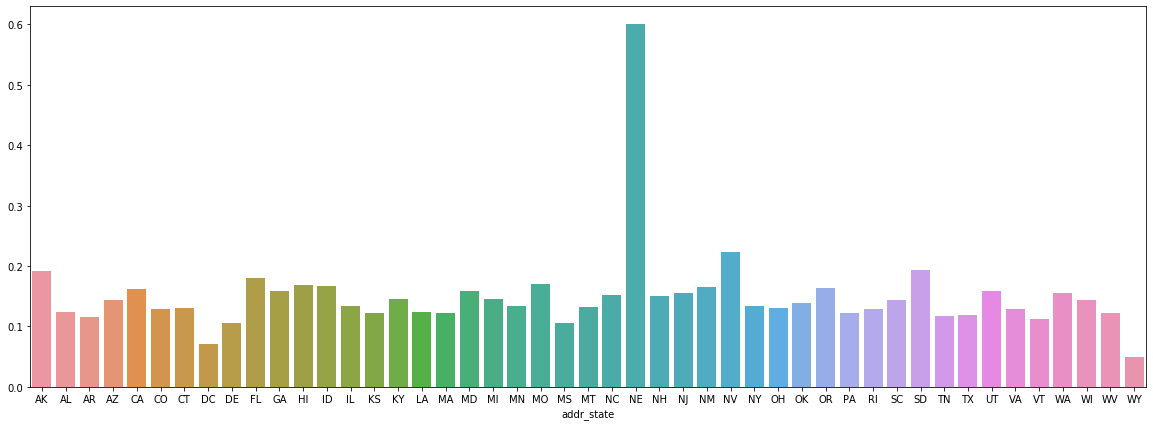

In [122]:
plt.figure(figsize=(20,7))
sns.barplot(x=chargedOffPortions.index,y=chargedOffPortions.values)
plt.show()
# chargedOffPortions

**Observation**
1. NE has a considerably high amount of 'Charged Off' history followed by NV

**Variable: dti**

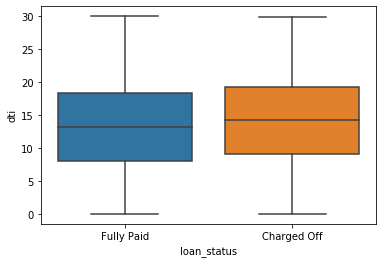

In [412]:
sns.boxplot(x='loan_status', y='dti', data=masterDF)
plt.show()

In [381]:
masterDF['dti'].describe()


count    38506.000000
mean        13.289028
std          6.665693
min          0.000000
25%          8.160000
50%         13.380000
75%         18.567500
max         29.990000
Name: dti, dtype: float64

 **Observation**
 1. Debt-to-income ratio is higher for Charged-off

**Variable: Purpose**

In [133]:
status_c=masterDF.groupby(['purpose','loan_status'])['loan_status'].count()
c=100*(status_c / len(masterDF))
c

purpose             loan_status
car                 0               3.477380
                    1               0.415520
credit_card         0              11.626759
                    1               1.407573
debt_consolidation  0              39.637978
                    1               7.183296
educational         0               0.695995
                    1               0.145432
home_improvement    0               6.549629
                    1               0.895964
house               0               0.797278
                    1               0.153223
major_purchase      0               4.999221
                    1               0.573937
medical             0               1.490677
                    1               0.275282
moving              0               1.251753
                    1               0.236327
other               0               8.367527
                    1               1.641303
renewable_energy    0               0.215551
                    1  

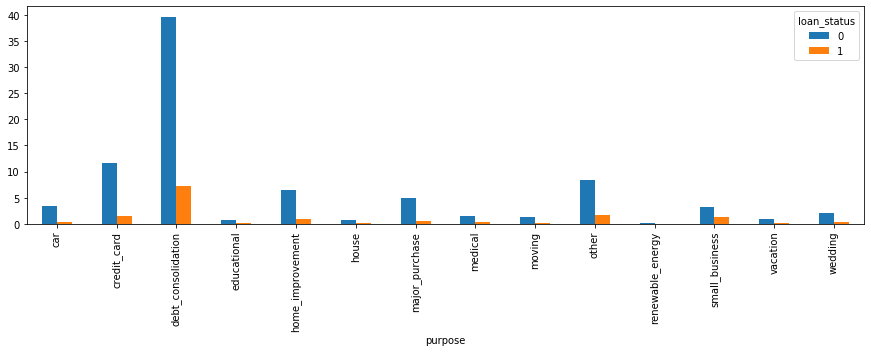

In [131]:
c.unstack().plot(kind='bar', figsize=(15,4))
plt.show()

**Observations**
1. High default rate for debt consolidation
2. Next is other and then credit card

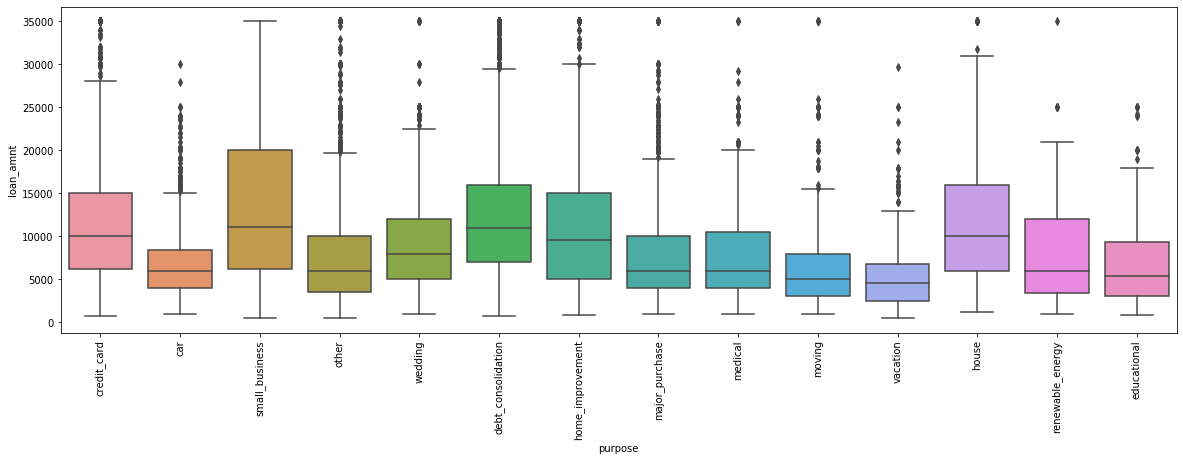

In [142]:
plt.figure(figsize=(20,6))
pur=sns.boxplot(x='purpose', y='loan_amnt', data=masterDF)
pur.set_xticklabels(pur.get_xticklabels(), rotation=90)
plt.show()

In [431]:
masterDF.groupby('purpose')['loan_amnt'].median()

purpose
car                    6000
credit_card           10000
debt_consolidation    11000
educational            5350
home_improvement       9600
house                 10000
major_purchase         6000
medical                6000
moving                 5000
other                  6000
renewable_energy       6000
small_business        11100
vacation               4550
wedding                8000
Name: loan_amnt, dtype: int64

**Observation**
1. The top 3 purposes (in terms of loan amount in USD) for which loan is availed are small business, debt consolidation, house and credit card
2. 25th percentile doesn't vary much, but the 75th one does

# Bivariate Analysis

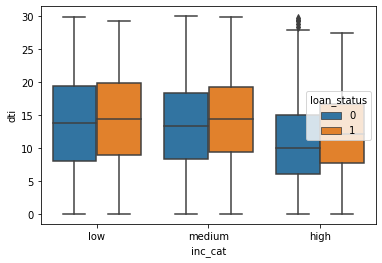

In [144]:
sns.boxplot(x='inc_cat',y='dti',hue='loan_status',data=masterDF)
plt.show()

**Observations**
1. Higher dti for lower income class
2. Ones with higher dti among income class category have higher chances of default
3. dti is good indicator of bad loans

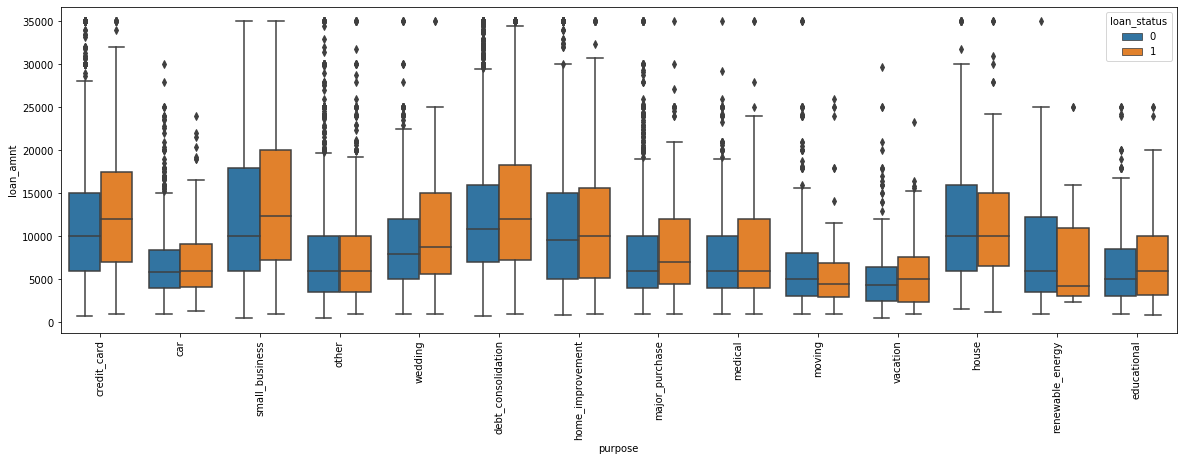

In [147]:
#imp
plt.figure(figsize=(20,6))
pur_bi=sns.boxplot(x='purpose', y='loan_amnt',hue='loan_status', data=masterDF)
pur_bi.set_xticklabels(pur.get_xticklabels(), rotation=90)
plt.show()

**Observations**
1. High default loan amounts is observed in larger loan amounts involved in small business, debt consolidation and credit card

In [148]:
inc_pur=masterDF.groupby(['inc_cat','purpose'])['purpose'].count()
inc_pur

inc_cat  purpose           
low      car                     436
         credit_card            1070
         debt_consolidation     4426
         educational             158
         home_improvement        449
         house                    80
         major_purchase          644
         medical                 205
         moving                  215
         other                  1274
         renewable_energy         32
         small_business          380
         vacation                121
         wedding                 208
medium   car                     976
         credit_card            3535
         debt_consolidation    12336
         educational             151
         home_improvement       1949
         house                   244
         major_purchase         1336
         medical                 420
         moving                  310
         other                  2348
         renewable_energy         60
         small_business         1174
         v

In [150]:
income_purpose_rate=100*inc_pur/len(loan)
income_purpose_rate

inc_cat  purpose           
low      car                    1.130207
         credit_card            2.773673
         debt_consolidation    11.473158
         educational            0.409570
         home_improvement       1.163906
         house                  0.207377
         major_purchase         1.669388
         medical                0.531405
         moving                 0.557327
         other                  3.302486
         renewable_energy       0.082951
         small_business         0.985043
         vacation               0.313658
         wedding                0.539181
medium   car                    2.530005
         credit_card            9.163491
         debt_consolidation    31.977603
         educational            0.391425
         home_improvement       5.052233
         house                  0.632501
         major_purchase         3.463203
         medical                1.088732
         moving                 0.803588
         other               

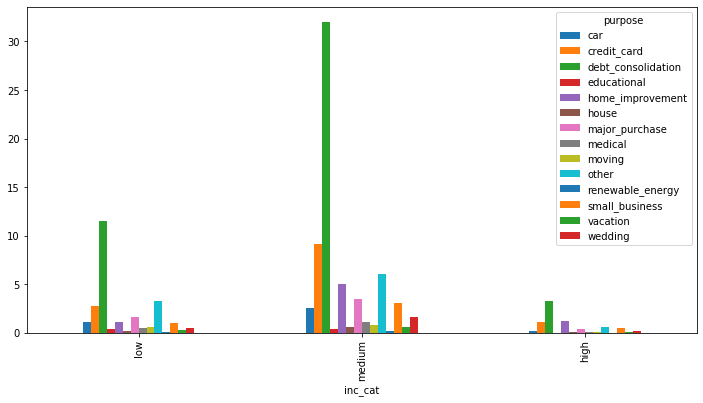

In [151]:
income_purpose_rate.unstack().plot(kind='bar', figsize=(12,6))

**Observations**
1. High Income: popular loan purpose = debt consolidation and home improvement
2. Medium and Low income: debt consolidation and credit card

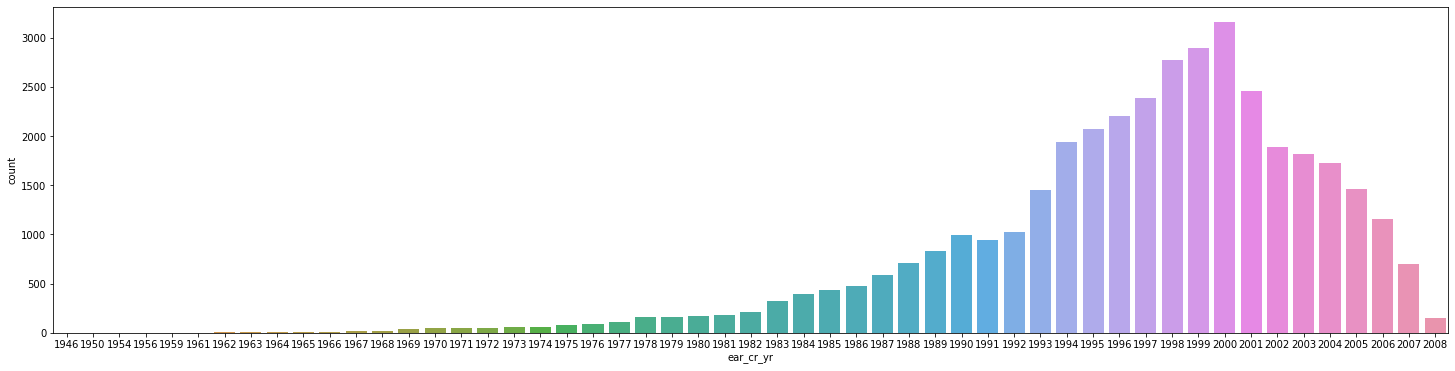

In [153]:
plt.figure(figsize=(25,6))
sns.countplot('ear_cr_yr',data=masterDF)

plt.show()

**Observations**
1. Borrowers who have earliest credit line in the year 2000 have availed highest loan

In [154]:
#Calculating credit age as derived metric as this may affect the loan default rate
masterDF['credit_age']=masterDF['issue_yr']-masterDF['ear_cr_yr']

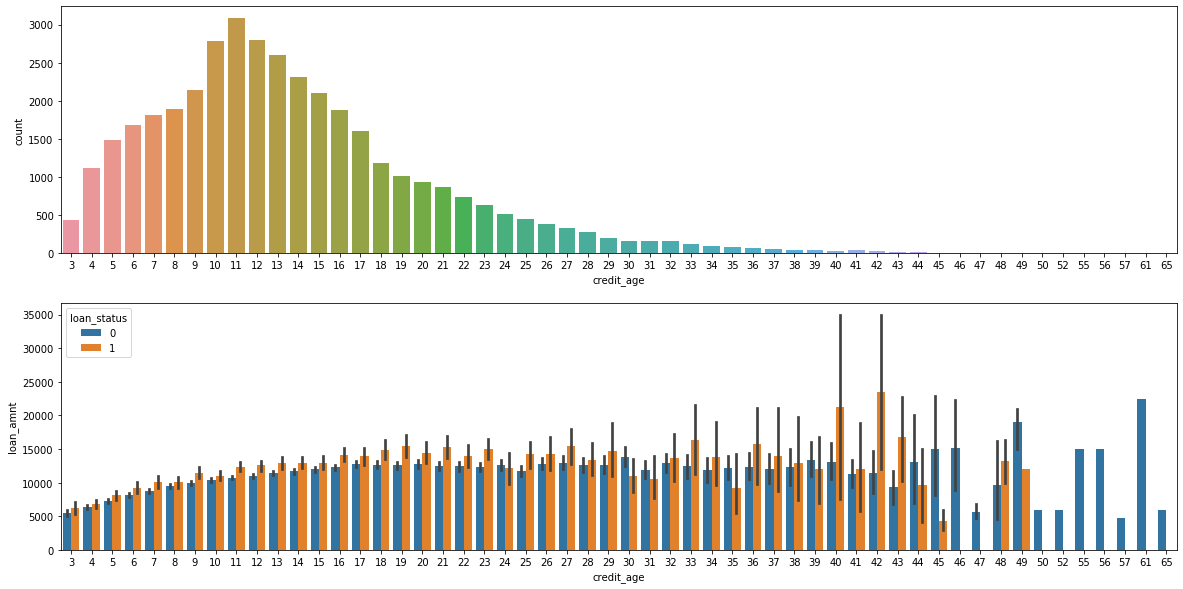

In [159]:
plt.figure(figsize=(20,10))
plt.subplot(2,1,1)
sns.countplot('credit_age',data=masterDF)
plt.subplot(2,1,2)
sns.barplot(x='credit_age',y='loan_amnt',hue='loan_status',data=masterDF)
plt.show()

**Observations**
1. Credit age of 11 is most occuring
2. The credit age above 50 years don't have a default loans at all, hence are the most ideal for offering loan along with age 46 and 47
3. The default loan amount increases for increasing age and stabilises at around 20

In [164]:
masterDF.drop(['out_prncp','out_prncp_inv'], axis=1, inplace=True)

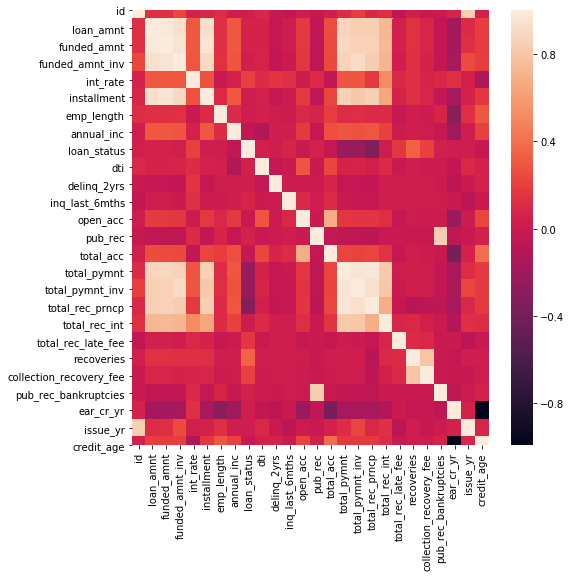

In [166]:
plt.figure(figsize=(8,8))
sns.heatmap(masterDF.corr())
plt.show()

In [ ]:
#We see a high correlation between loan_amnt, funded_amnt and funded_amnt_inv
#This tells us that there is a good chance that applicant is recieving the loan as they had requested for